In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [35]:
fn = '21042021_20-06-46'
path = '../src/Data/PDi/circular_traj/'
df = pd.read_csv(os.path.join(path, fn))

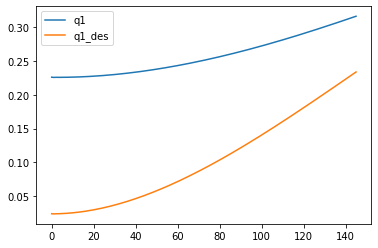

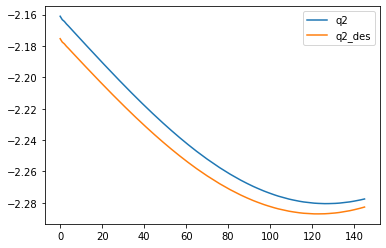

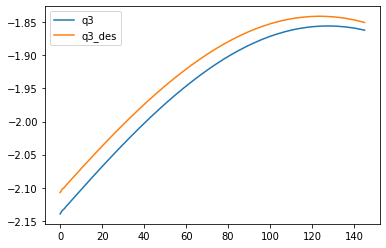

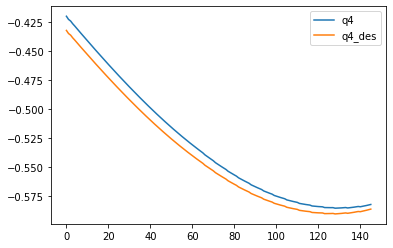

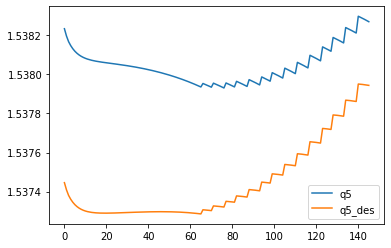

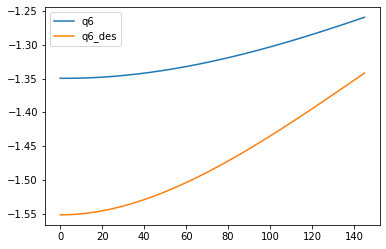

In [36]:
for i in range(1,7):
    f = plt.figure()
    v = df['q{}'.format(i)].values
    vd = df['q{}_des'.format(i)].values
    plt.plot(v)
    plt.plot(vd)
    plt.legend(('q{}'.format(i),'q{}_des'.format(i)))

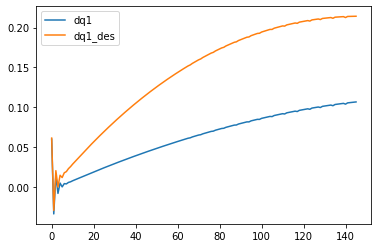

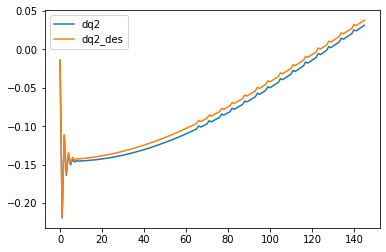

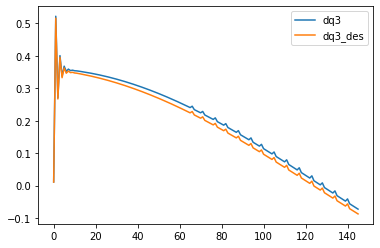

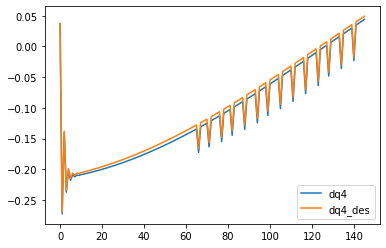

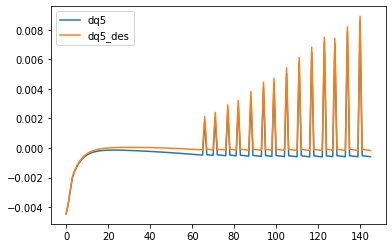

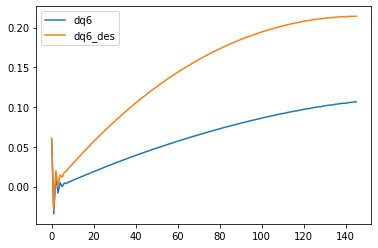

In [37]:
for i in range(1,7):
    f = plt.figure()
    v = df['dq{}'.format(i)].values
    vd = df['dq{}_des'.format(i)].values
    plt.plot(v)
    plt.plot(vd)
    plt.legend(('dq{}'.format(i),'dq{}_des'.format(i)))

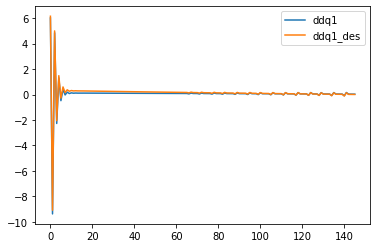

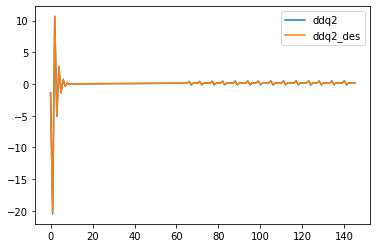

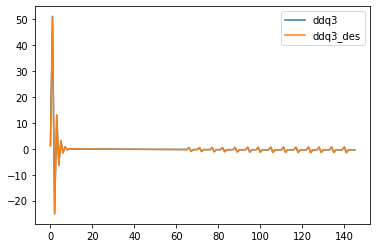

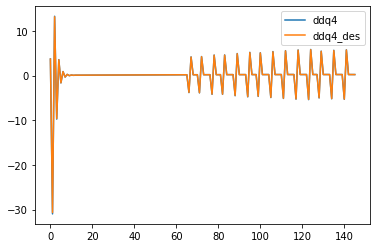

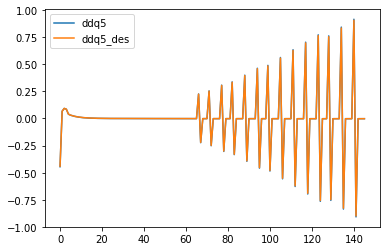

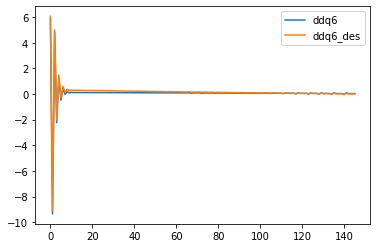

In [38]:
for i in range(1,7):
    f = plt.figure()
    v = df['ddq{}'.format(i)].values
    vd = df['ddq{}_des'.format(i)].values
    plt.plot(v)
    plt.plot(vd)
    plt.legend(('ddq{}'.format(i),'ddq{}_des'.format(i)))

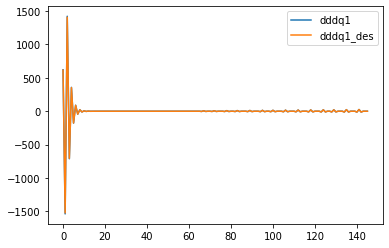

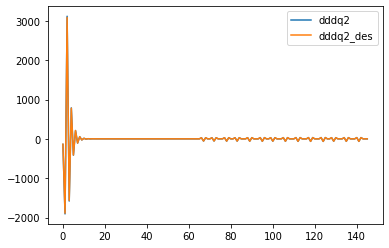

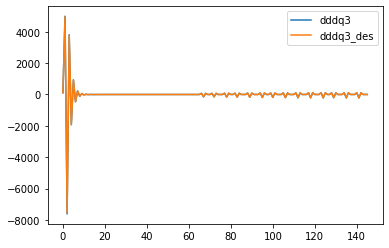

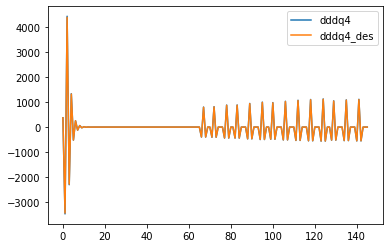

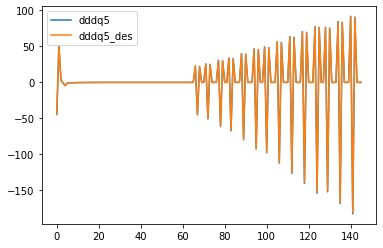

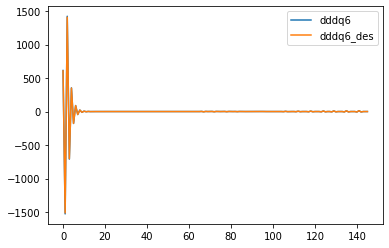

In [39]:
for i in range(1,7):
    f = plt.figure()
    v = df['dddq{}'.format(i)].values
    vd = df['dddq{}_des'.format(i)].values
    plt.plot(v)
    plt.plot(vd)
    plt.legend(('dddq{}'.format(i),'dddq{}_des'.format(i)))

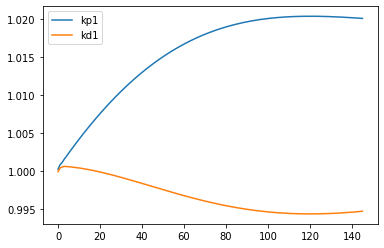

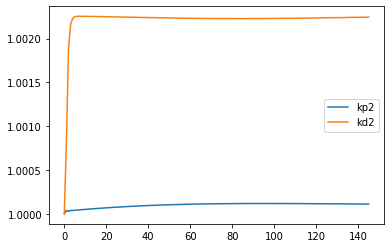

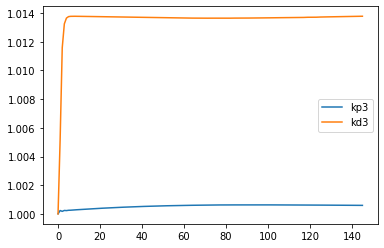

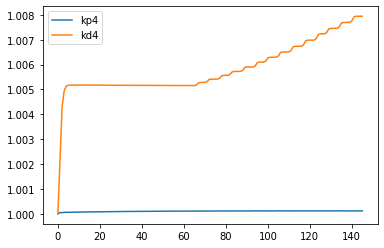

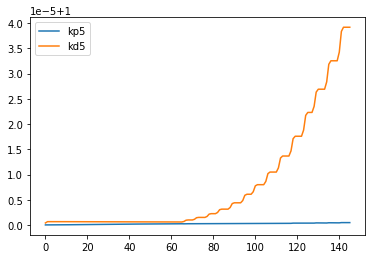

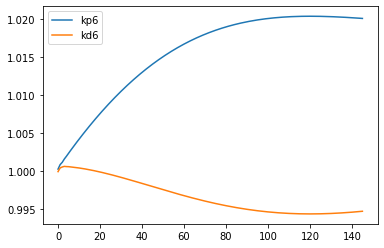

In [40]:
for i in range(1,7):
    f = plt.figure()
    v = df['kp{}'.format(i)].values
    b = df['kd{}'.format(i)].values
    plt.plot(v)
    plt.plot(b)
    plt.legend(('kp{}'.format(i), 'kd{}'.format(i)) )